In [2]:
import pandas as pd
import plotnine
plotnine.options.figure_size = (12, 10)

ess2018 = pd.read_csv("https://github.com/CALDISS-AAU/course_ddf/raw/master/datasets/ESS2018DK_subset.csv")

# Sammenligning af fordelinger og kategorier

En række visualiseringer har til formål at vise forskelle i fordelinger i data - enten fordelinger inden for variable eller fordelinger på tværs af kategorier.

I dette introduceres til diverse visualiseringer, der har til formål at sammenligne fordelinger og kategorier, samt hvordan disse laves med `ggplot2`/`plotnine`.

## Histogram

Et histogram er en af de mest anvendte måder at inspicere fordelingen af en *kontinuerlig/intervalskaleret* variabel. Et histogram inddeler observationer i søjler ("bins") ud fra intervaller, og viser antal i hvert interval.

Bruges blandt andet til:
- Inspicere fordeling (normalfordelt)
- Skævvridning (generelt høje eller lave værdier)
- Identifiering af outliers

I `ggplot2`/`plotnine` dannes et histogram med `geom_histogram`:

C:\programs\Anaconda3\envs\mlbase\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 37'. Pick better value with 'binwidth'.


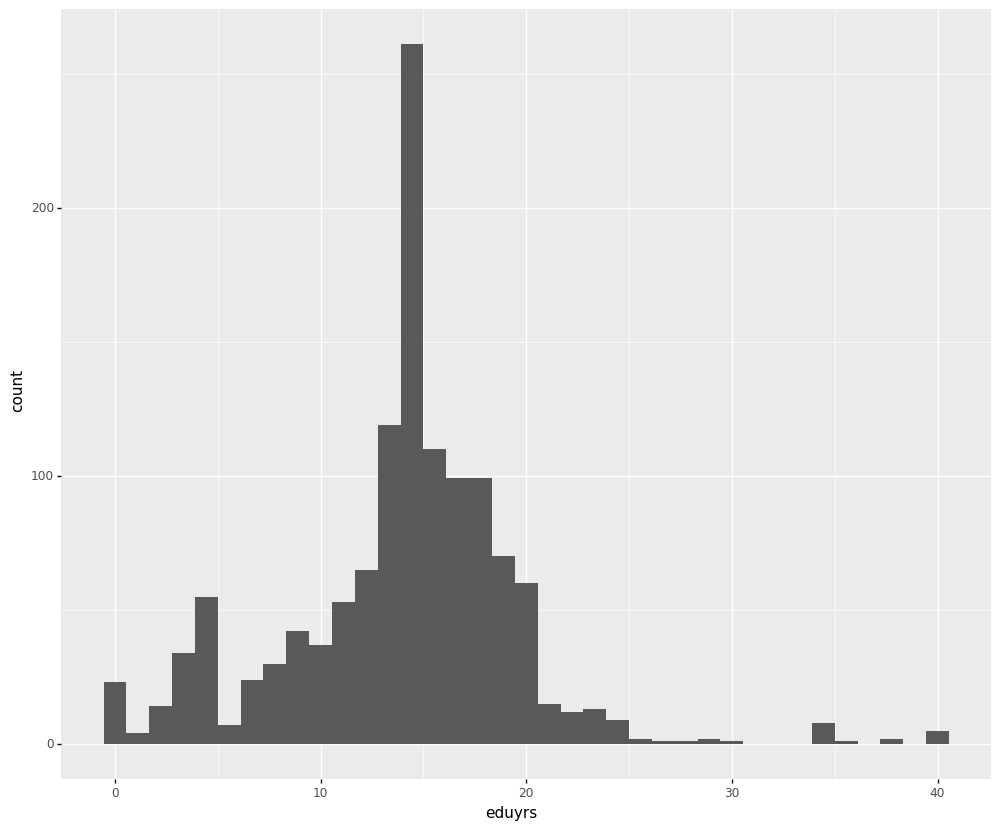

<ggplot: (-9223371928808216992)>

In [8]:
from plotnine import ggplot, aes, geom_histogram

ess2018_filt = ess2018.dropna(subset = ['eduyrs'])

(ggplot(data = ess2018_filt, mapping = aes(x = 'eduyrs')) 
 + geom_histogram())

Størrelsen på bins kan ændres med `binwidth`:

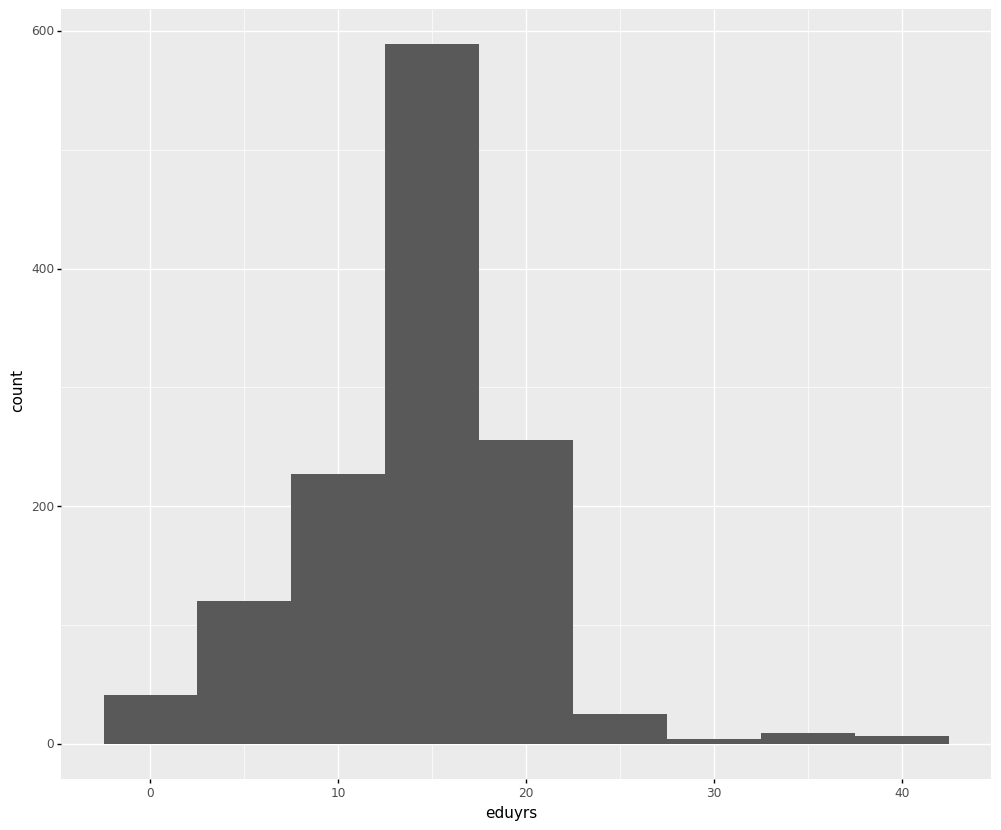

<ggplot: (-9223371928807720140)>

In [11]:
(ggplot(data = ess2018_filt, mapping = aes(x = 'eduyrs')) 
 + geom_histogram(binwidth = 5))

Histogrammer kan også farvelægges efter anden variabel:

C:\programs\Anaconda3\envs\mlbase\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 37'. Pick better value with 'binwidth'.


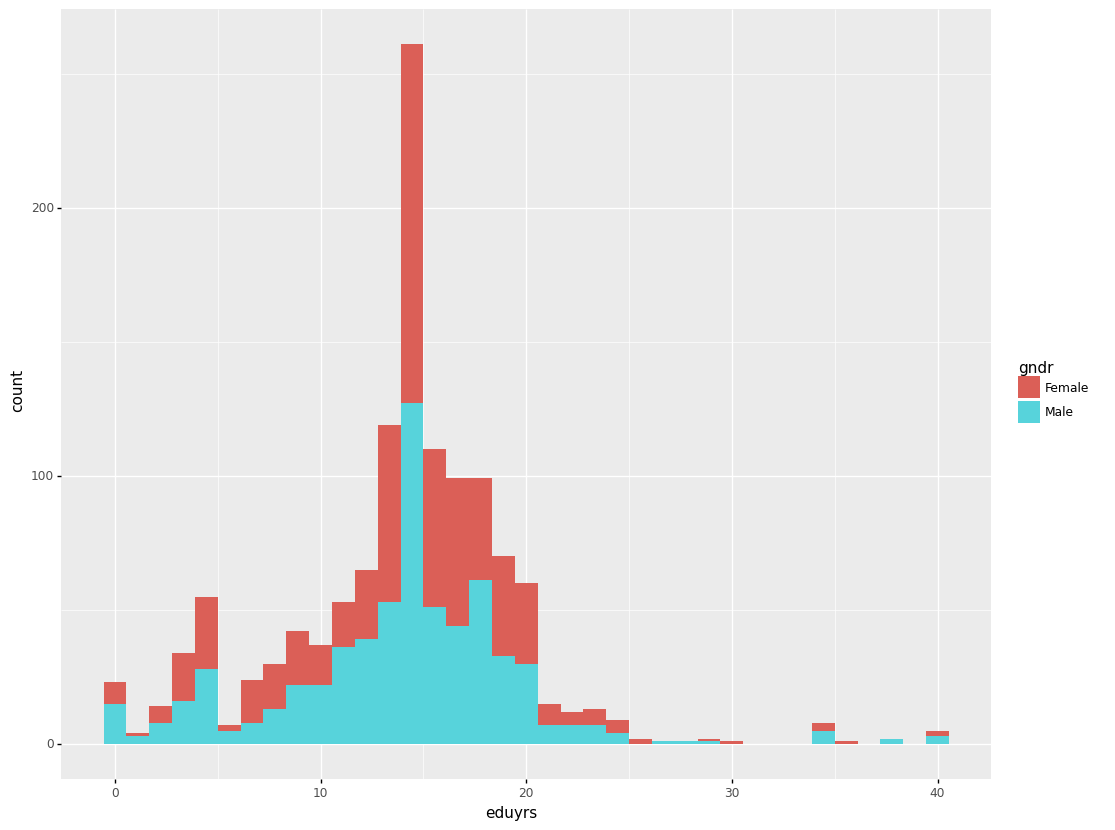

<ggplot: (-9223371928807417472)>

In [14]:
(ggplot(data = ess2018_filt, mapping = aes(x = 'eduyrs', fill = 'gndr')) 
 + geom_histogram())

## Frequency polygons

Alternativt til histogrammer kan fordelinger visualiseres som en kurve ("frequency polygons").

Disse dannes med `geom_freqpoly`:

C:\programs\Anaconda3\envs\mlbase\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 37'. Pick better value with 'binwidth'.


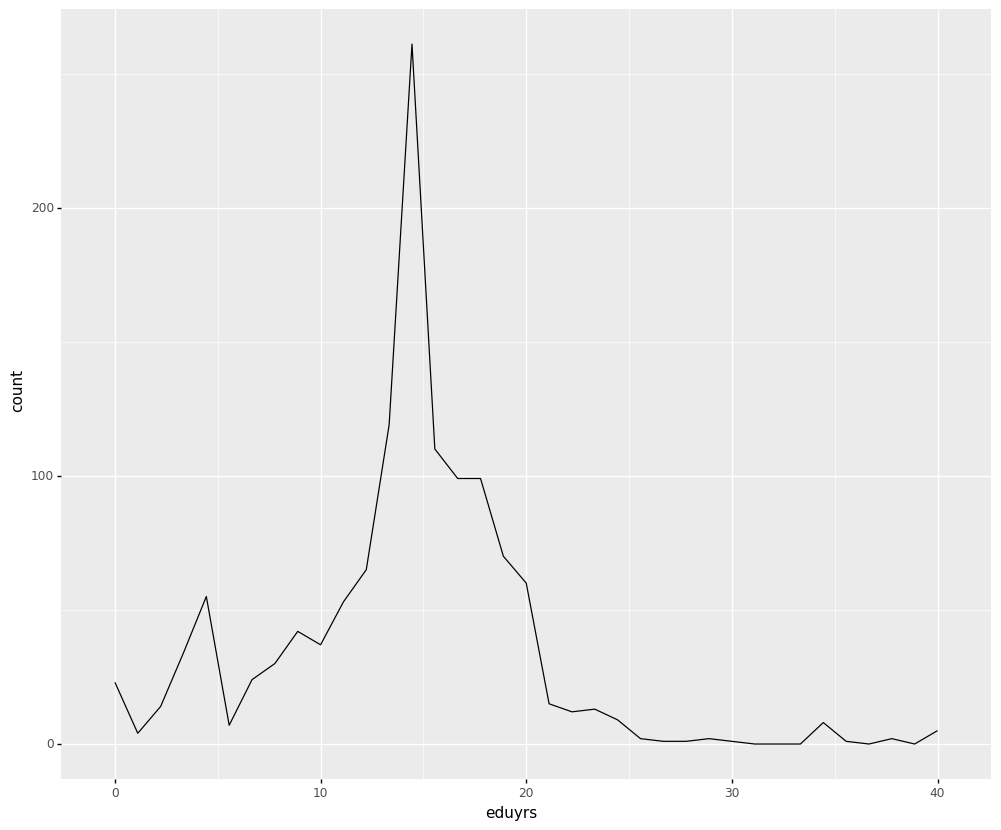

<ggplot: (-9223371928807376496)>

In [15]:
from plotnine import ggplot, aes, geom_freqpoly

(ggplot(data = ess2018_filt, mapping = aes(x = 'eduyrs')) 
 + geom_freqpoly())

Ved at specificere `colour` aesthetic, kan man lettere sammenligne fordelinger:

C:\programs\Anaconda3\envs\mlbase\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 37'. Pick better value with 'binwidth'.


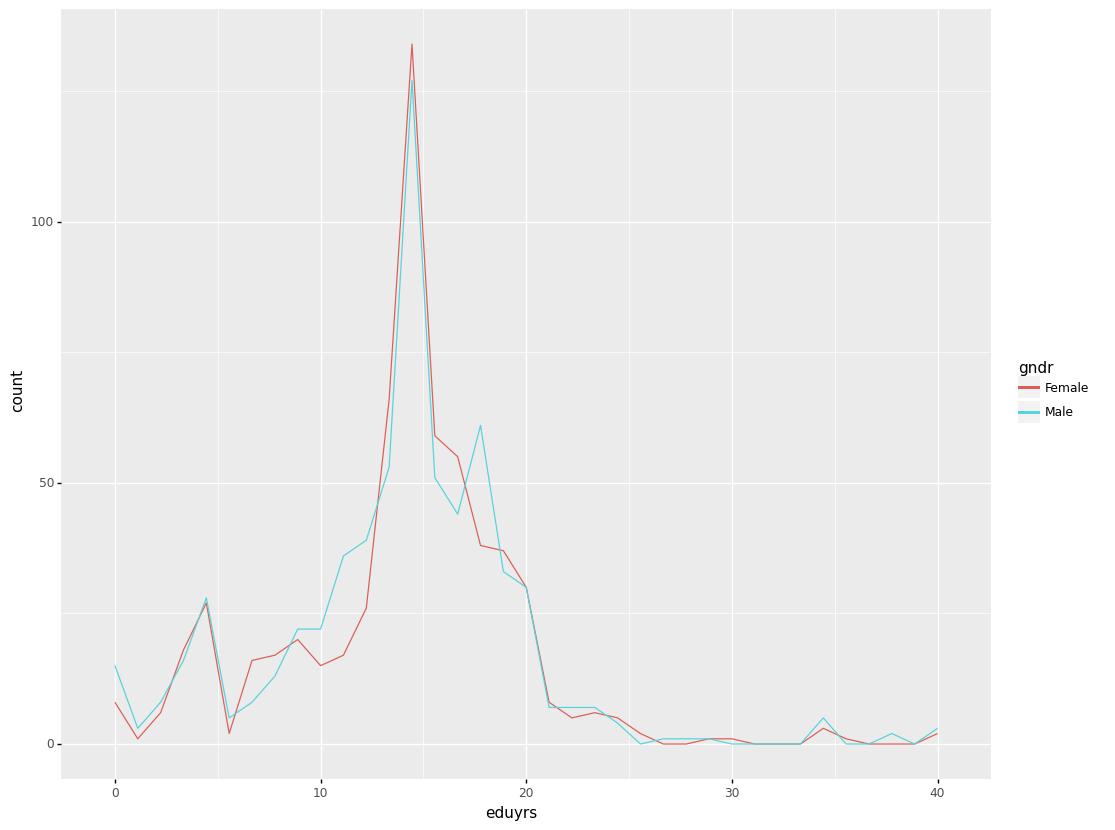

<ggplot: (-9223371928806980444)>

In [22]:
(ggplot(data = ess2018_filt, mapping = aes(x = 'eduyrs', colour = 'gndr')) 
 + geom_freqpoly())

Kurven kan baseres på densities frem for tællinger:

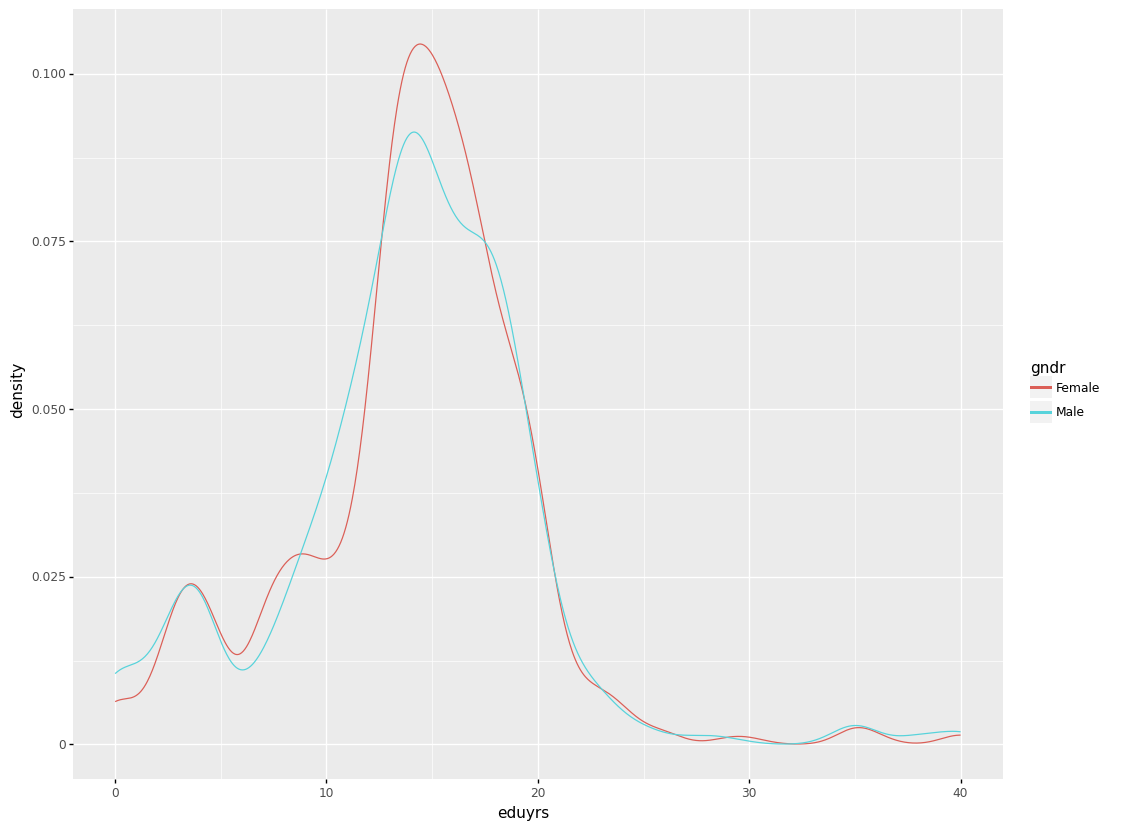

<ggplot: (-9223371928806949404)>

In [23]:
(ggplot(data = ess2018_filt, mapping = aes(x = 'eduyrs', colour = 'gndr')) 
 + geom_freqpoly(stat = 'density'))

Kurver kan også lægges oveni et histogram:

C:\programs\Anaconda3\envs\mlbase\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 37'. Pick better value with 'binwidth'.
C:\programs\Anaconda3\envs\mlbase\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 37'. Pick better value with 'binwidth'.


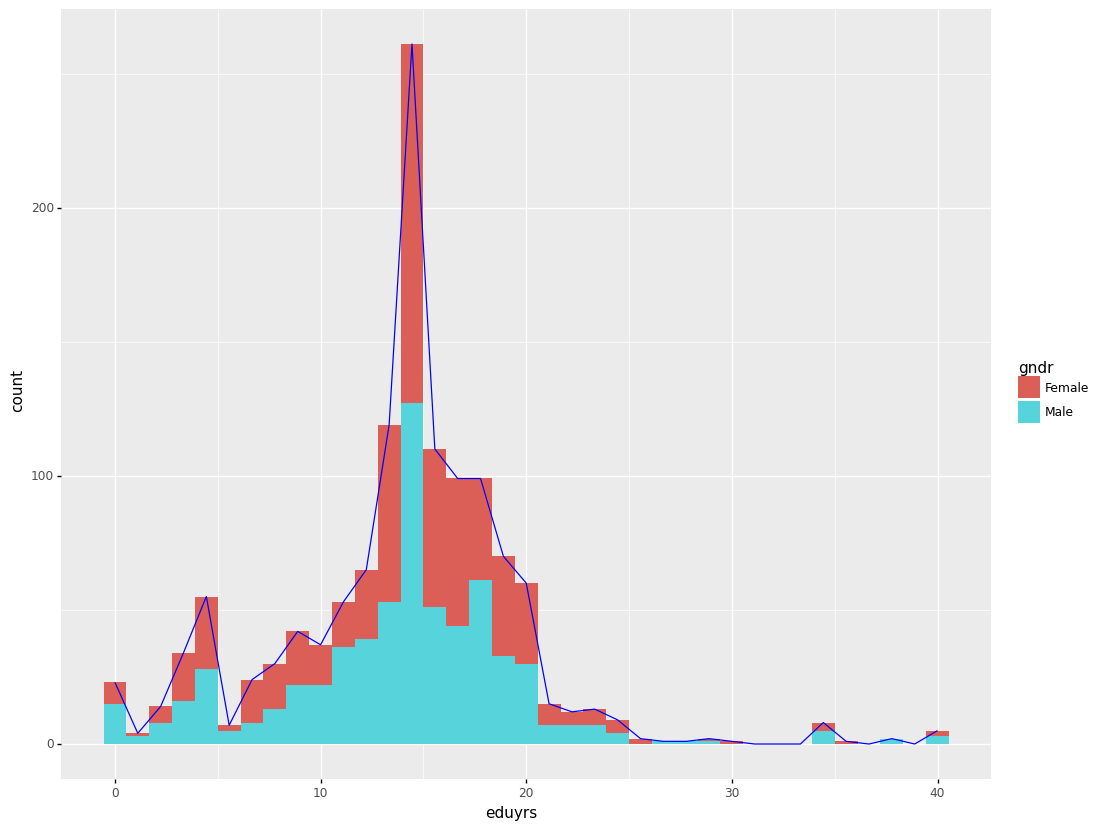

<ggplot: (-9223371928807818704)>

In [43]:
(ggplot(data = ess2018_filt, mapping = aes(x = 'eduyrs')) 
 + geom_histogram(aes(fill = 'gndr'))
 + geom_freqpoly(colour = 'blue'))

# Box-and-whisker plots (boxplots)

Fordelinger kan også visualiseres som box-and-whisker plot. Box-and-whisker plot visualiserer spredningen i variablen (min, max, kvartiler, median). De egner sig især til at sammenligne fordelinger mellem forskellige kategorier.

I `ggplot2`/`plotnine` dannes et box-and-whisker plot med `geom_boxplot`:

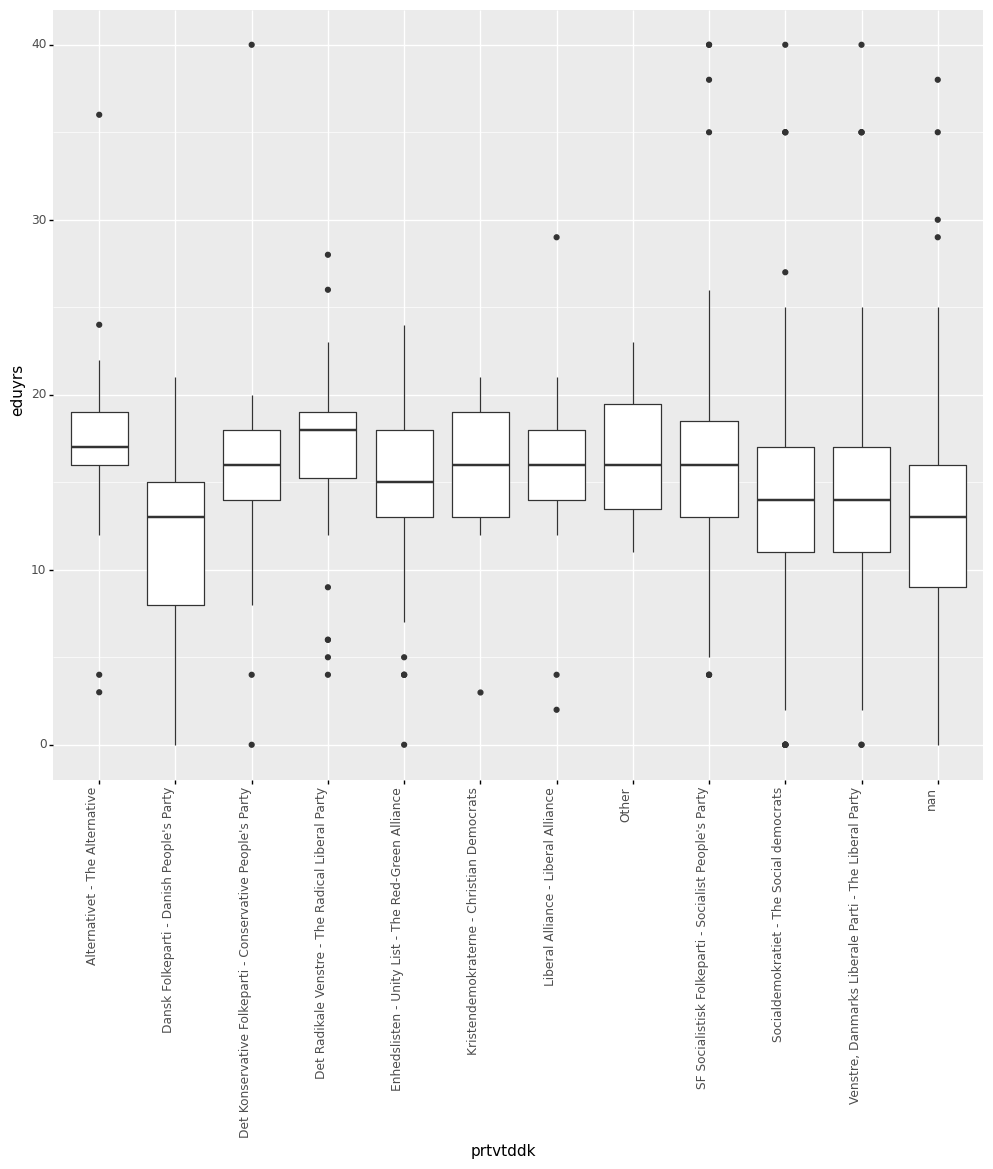

<ggplot: (-9223371928804303120)>

In [60]:
from plotnine import geom_boxplot, theme, element_text

(ggplot(data = ess2018_filt, mapping = aes(x = 'prtvtddk', y = 'eduyrs')) 
 + geom_boxplot()
 + theme(axis_text_x=element_text(rotation=90, hjust=1)))

Med tredje variabel:

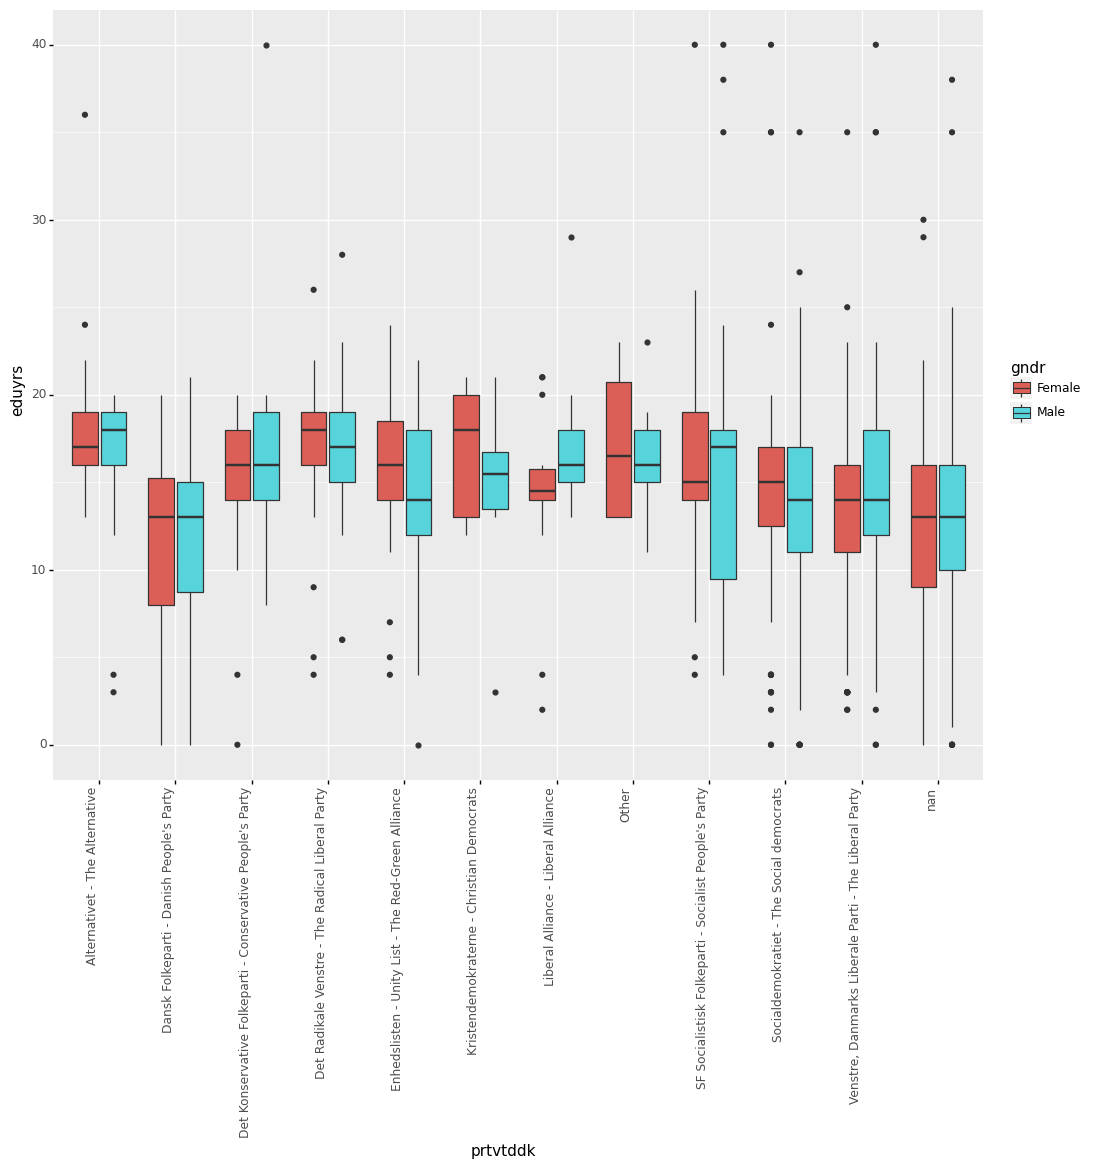

<ggplot: (-9223371928805695328)>

In [61]:
from plotnine import geom_boxplot, theme, element_text

(ggplot(data = ess2018_filt, mapping = aes(x = 'prtvtddk', y = 'eduyrs', fill = 'gndr')) 
 + geom_boxplot()
 + theme(axis_text_x=element_text(rotation=90, hjust=1)))

## Bar charts

Histogrammer, frequency polygons og box-and-whisker plots bruges til at inspicere fordelinger i kontinuerlige/intervalskalerede variable. 

For at sammenligne størrelser på kategorier, er den mest anvende visualisering et søjlediagram (bar chart). Et søjlediagram - i sin klassiske form - optæller antal i hver kategori for variablen, der skal visualiseres, og tildeler hver kategori en søjle.

I `ggplot2`/`plotnine` dannes et søjlediagram med `geom_bar`:

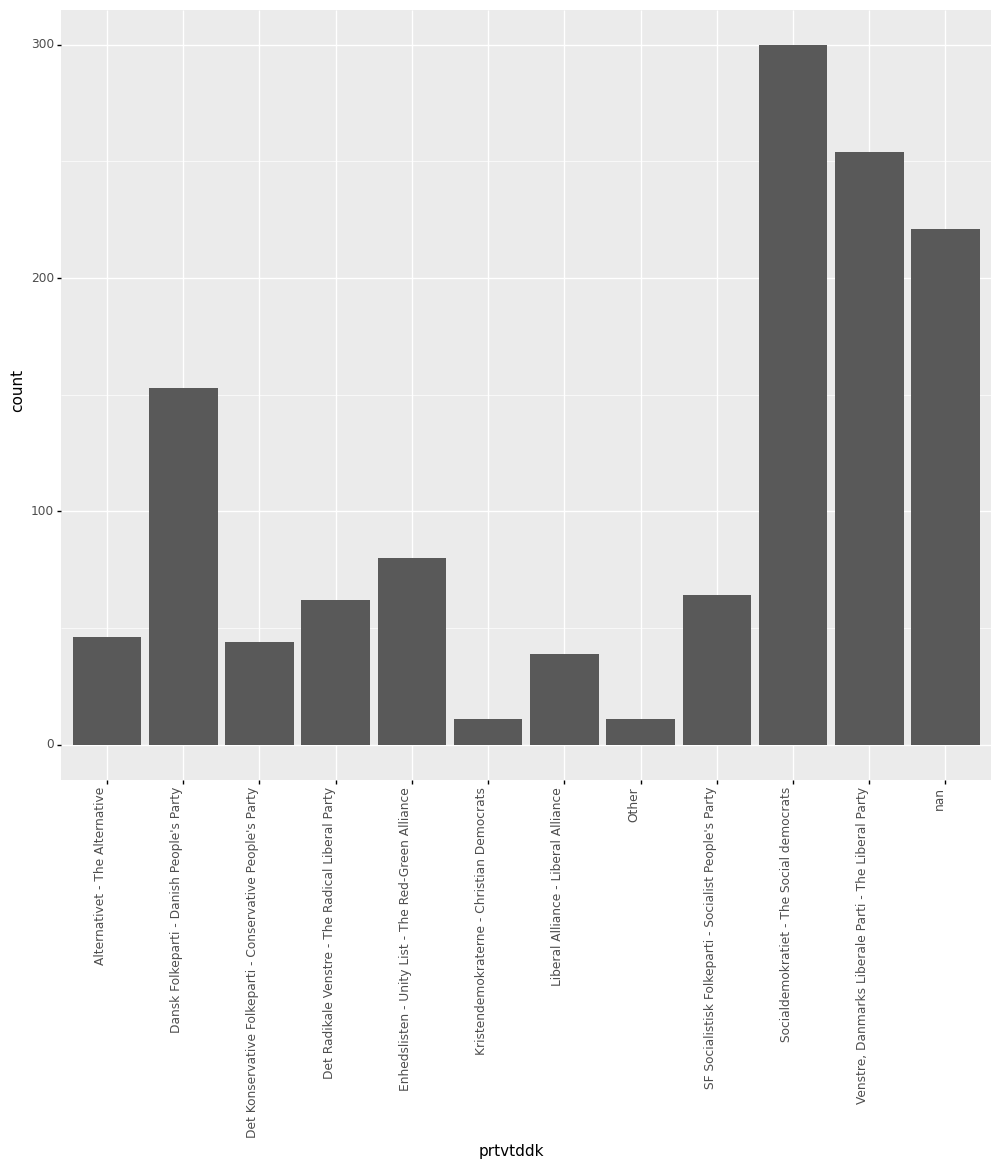

<ggplot: (-9223371928806981588)>

In [63]:
from plotnine import geom_bar

(ggplot(data = ess2018, mapping = aes(x = 'prtvtddk')) 
 + geom_bar()
 + theme(axis_text_x=element_text(rotation=90, hjust=1)))

Også denne kan udbygges med flere variable (grupperede barchart):

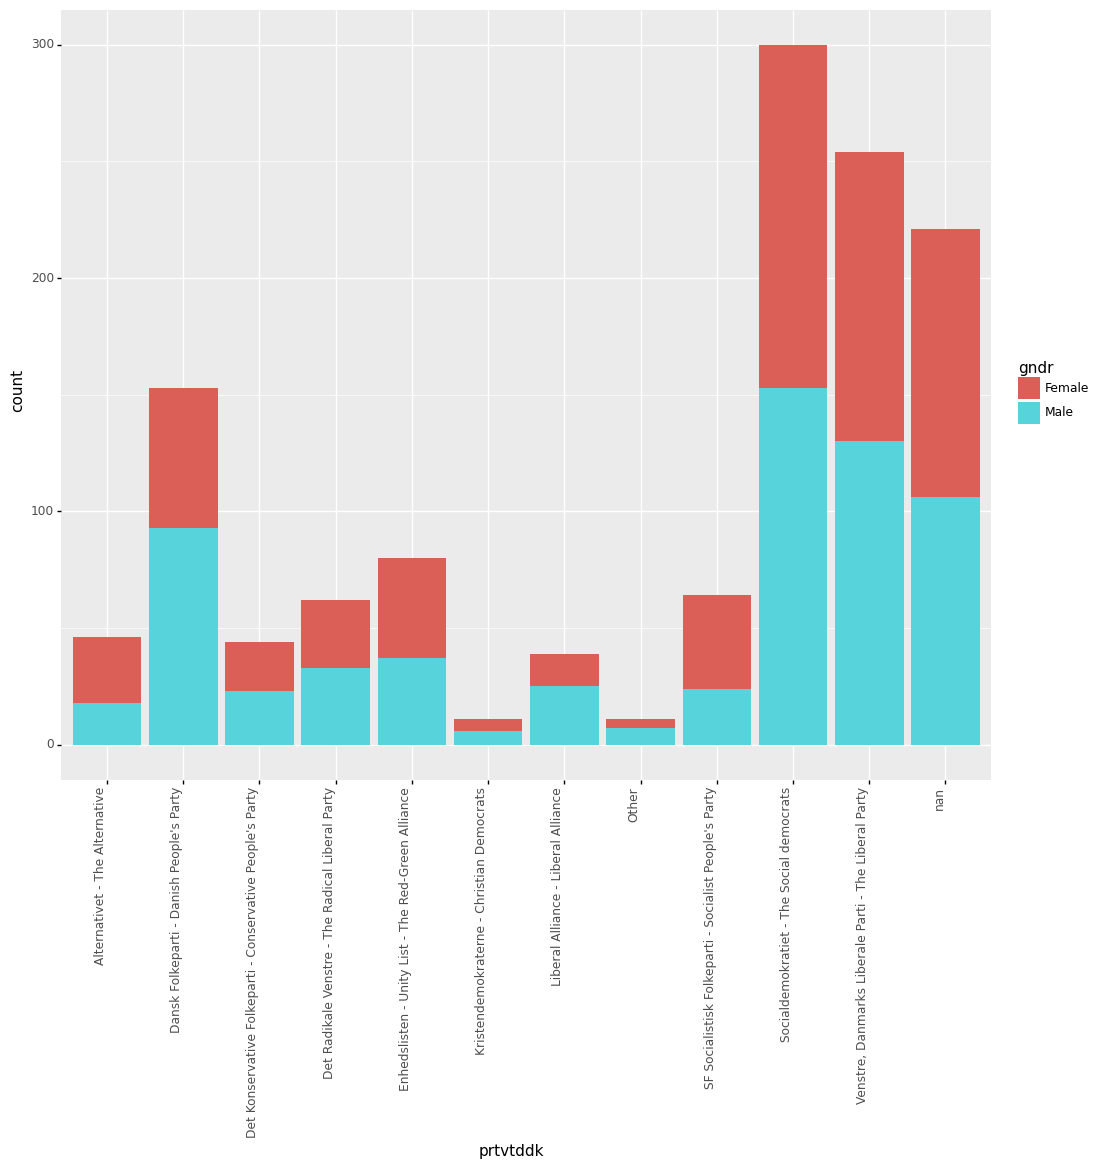

<ggplot: (-9223371928807299172)>

In [64]:
(ggplot(data = ess2018, mapping = aes(x = 'prtvtddk', fill = 'gndr')) 
 + geom_bar()
 + theme(axis_text_x=element_text(rotation=90, hjust=1)))

Ved grupperede barcharts sættes kategorierne som standard oven på hinanden. Dette kan ændres med `position` argumentet:

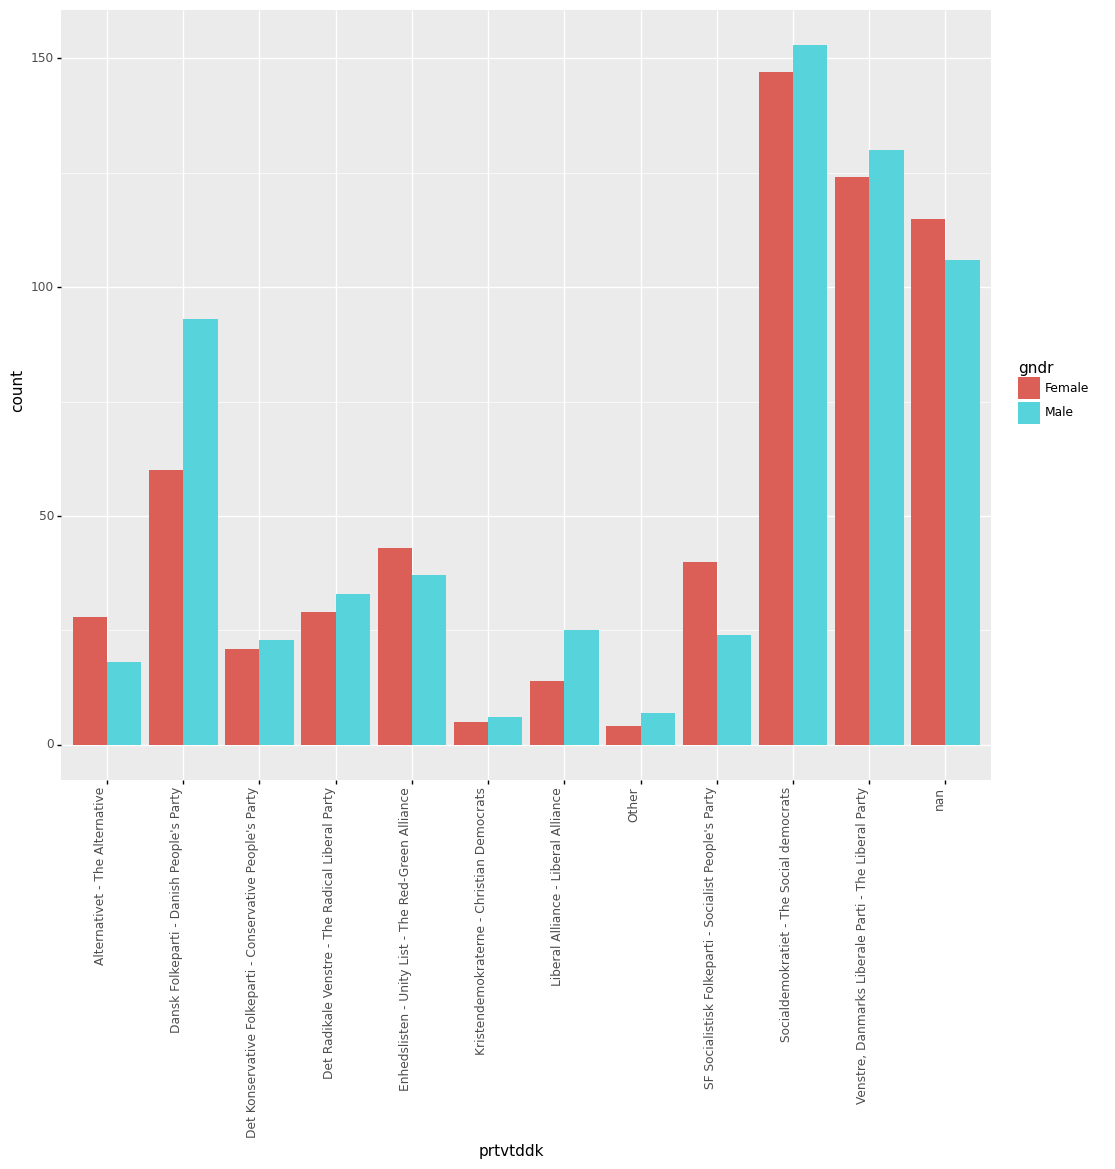

<ggplot: (-9223371928807356200)>

In [65]:
(ggplot(data = ess2018, mapping = aes(x = 'prtvtddk', fill = 'gndr')) 
 + geom_bar(position = 'dodge')
 + theme(axis_text_x=element_text(rotation=90, hjust=1)))

Kan også vises stacked procentueret:

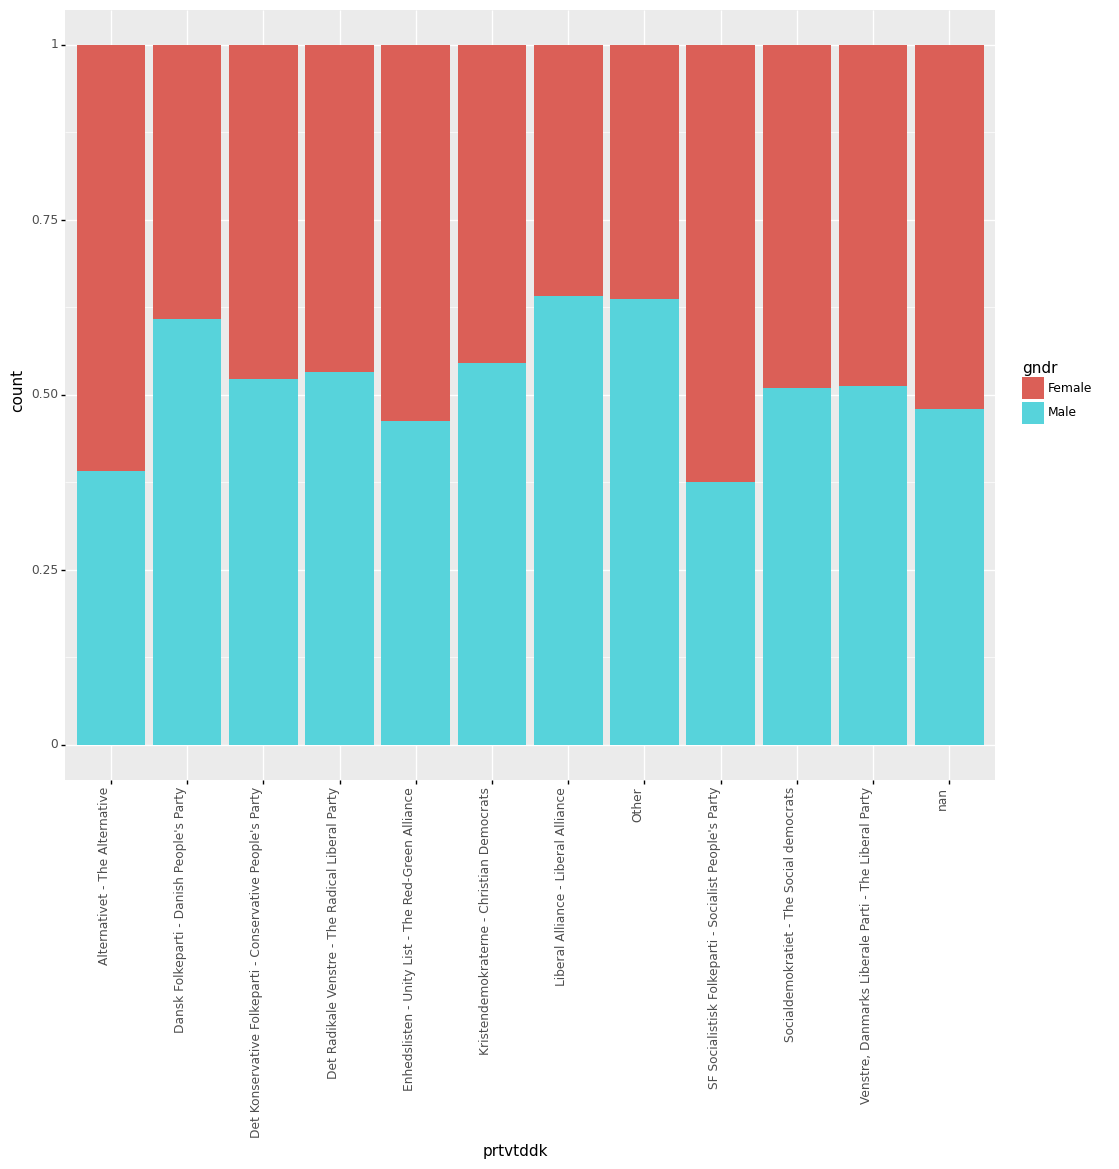

<ggplot: (-9223371928807300500)>

In [66]:
(ggplot(data = ess2018, mapping = aes(x = 'prtvtddk', fill = 'gndr')) 
 + geom_bar(position = 'fill')
 + theme(axis_text_x=element_text(rotation=90, hjust=1)))

# ØVELSE 2: VISUALISERING AF FORDELINGER

Vi ønsker at undersøge forskelle i fordelingen i indkomst mellem mænd og kvinder i datasættet (`grspnum`). 

Lav en passende visualisering til at udforske dette.

**Bonus øvelse**

Udforsk fordeling i indkomst mellem aldersgrupper, som du selv danner ud fra `yrbrn`.